In [1]:
import pandas as pd

store = pd.HDFStore('../storage/encode_repeatmasker_stats.hdf')

In [2]:
store.keys()

['/overlap_hg19_DNase_H3K27ac_immortalized_cell_line_SINE_Alu',
 '/overlap_hg19_DNase_H3K27ac_in_vitro_differentiated_cells_SINE_Alu',
 '/overlap_hg19_DNase_H3K27ac_induced_pluripotent_stem_cell_line_SINE_Alu',
 '/overlap_hg19_DNase_H3K27ac_primary_cell_SINE_Alu',
 '/overlap_hg19_DNase_H3K27ac_stem_cell_SINE_Alu',
 '/overlap_hg19_DNase_H3K27ac_stem_cell_SINE_MIR',
 '/overlap_hg19_DNase_H3K27ac_tissue_SINE_Alu',
 '/overlap_hg19_DNase_H3K27ac_tissue_SINE_MIR',
 '/reldist_hg19_DNase_H3K27ac_immortalized_cell_line_SINE_Alu',
 '/reldist_hg19_DNase_H3K27ac_in_vitro_differentiated_cells_SINE_Alu',
 '/reldist_hg19_DNase_H3K27ac_induced_pluripotent_stem_cell_line_SINE_Alu',
 '/reldist_hg19_DNase_H3K27ac_primary_cell_SINE_Alu',
 '/reldist_hg19_DNase_H3K27ac_stem_cell_SINE_Alu',
 '/reldist_hg19_DNase_H3K27ac_stem_cell_SINE_MIR',
 '/reldist_hg19_DNase_H3K27ac_tissue_SINE_Alu',
 '/reldist_hg19_DNase_H3K27ac_tissue_SINE_MIR']

In [3]:
store.close()

## Tissues

In [4]:
import seaborn as sns
%matplotlib inline

In [17]:
tissue_reldist_df = pd.read_hdf('../storage/encode_repeatmasker_stats.hdf', 'reldist_hg19_DNase_H3K27ac_tissue_SINE_Alu')
tissue_reldist_df_MIR = pd.read_hdf('../storage/encode_repeatmasker_stats.hdf', 'reldist_hg19_DNase_H3K27ac_tissue_SINE_MIR')


In [6]:
tissue_reldist_df.T

,0,1,2,3,4,5,6,7,8,9,...,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988
encyclopedia,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,...,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE
biosample_type,tissue,tissue,tissue,tissue,tissue,tissue,tissue,tissue,tissue,tissue,...,tissue,tissue,tissue,tissue,tissue,tissue,tissue,tissue,tissue,tissue
biosample_name,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,...,small intestine,small intestine,small intestine,small intestine,small intestine,small intestine,small intestine,small intestine,small intestine,small intestine
ovlp_encyclopedia,SINE_Alu,SINE_Alu,SINE_Alu,SINE_Alu,SINE_Alu,SINE_Alu,SINE_Alu,SINE_Alu,SINE_Alu,SINE_Alu,...,SHUFFLED,SHUFFLED,SHUFFLED,SHUFFLED,SHUFFLED,SHUFFLED,SHUFFLED,SHUFFLED,SHUFFLED,SHUFFLED
encyclopedia_size,38634,38634,38634,38634,38634,38634,38634,38634,38634,38634,...,38719,38719,38719,38719,38719,38719,38719,38719,38719,38719
ovlp_encyclopedia_size,1.17725e+06,1.17725e+06,1.17725e+06,1.17725e+06,1.17725e+06,1.17725e+06,1.17725e+06,1.17725e+06,1.17725e+06,1.17725e+06,...,1.17725e+06,1.17725e+06,1.17725e+06,1.17725e+06,1.17725e+06,1.17725e+06,1.17725e+06,1.17725e+06,1.17725e+06,1.17725e+06
reldist,0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5
ovlp_count,219,249,276,337,357,375,422,435,514,550,...,780,795,759,777,738,842,770,818,764,9
ovlp_fraction,0.006,0.006,0.007,0.009,0.009,0.01,0.011,0.011,0.013,0.014,...,0.02,0.021,0.02,0.02,0.019,0.022,0.02,0.021,0.02,0


Ks_2sampResult(statistic=0.099999999999999978, pvalue=0.95412926422218847)

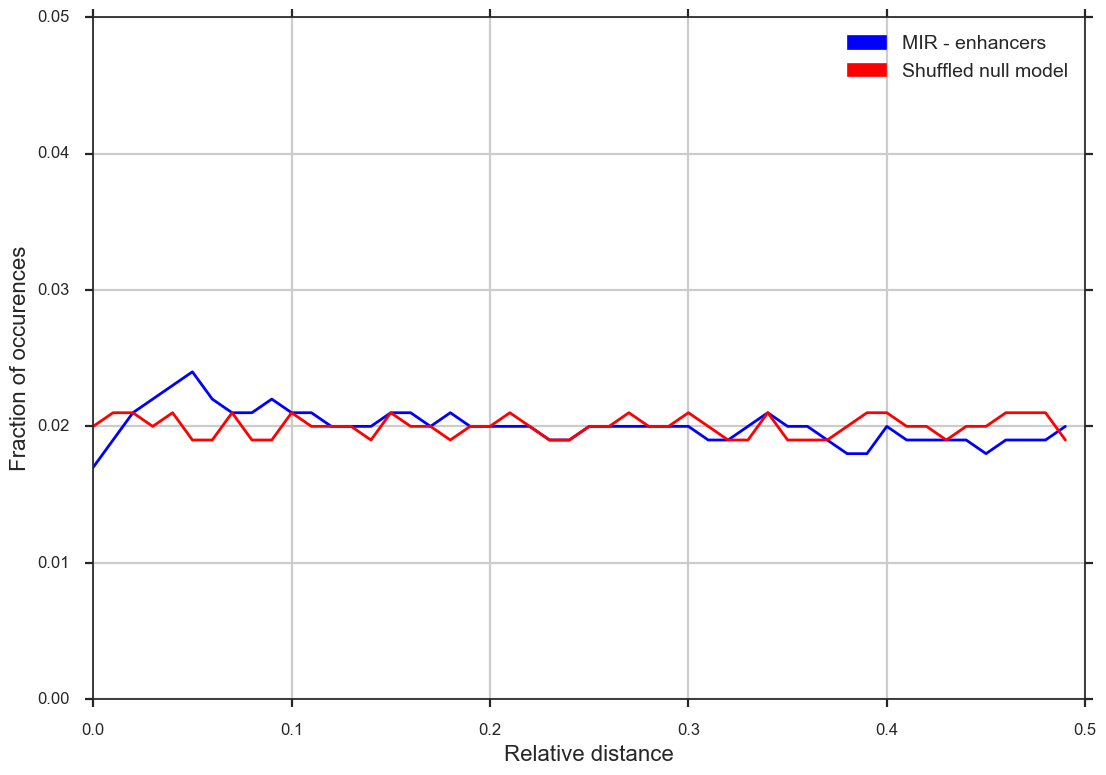

In [21]:
placenta_reldist_df = tissue_reldist_df_MIR.query("ovlp_fraction > 0 & biosample_name=='placenta'")

df_reldist = placenta_reldist_df.query("ovlp_encyclopedia=='SINE_MIR'")
df_reldist_random = placenta_reldist_df.query("ovlp_encyclopedia=='SHUFFLED'")


import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})

fig = plt.figure()
ax = fig.add_subplot(111)
g = plt.plot(df_reldist['reldist'], df_reldist['ovlp_fraction'], c='blue')
g = plt.plot(df_reldist_random['reldist'], df_reldist_random['ovlp_fraction'], c='red')

plt.grid()
ax.set_xlabel('Relative distance', size=16)
ax.set_ylabel('Fraction of occurences', size=16)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(12) 
        
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(12) 

green_patch = mpatches.Patch(color='blue', label='MIR - enhancers')
blue_patch = mpatches.Patch(color='red', label='Shuffled null model')

plt.legend(handles=[green_patch, blue_patch], fontsize=14, loc=1)

ax.set_ylim(0, 0.05)

st.ks_2samp(df_reldist['ovlp_fraction'], df_reldist_random['ovlp_fraction'])

Ks_2sampResult(statistic=0.52000000000000002, pvalue=1.2334523759000001e-06)

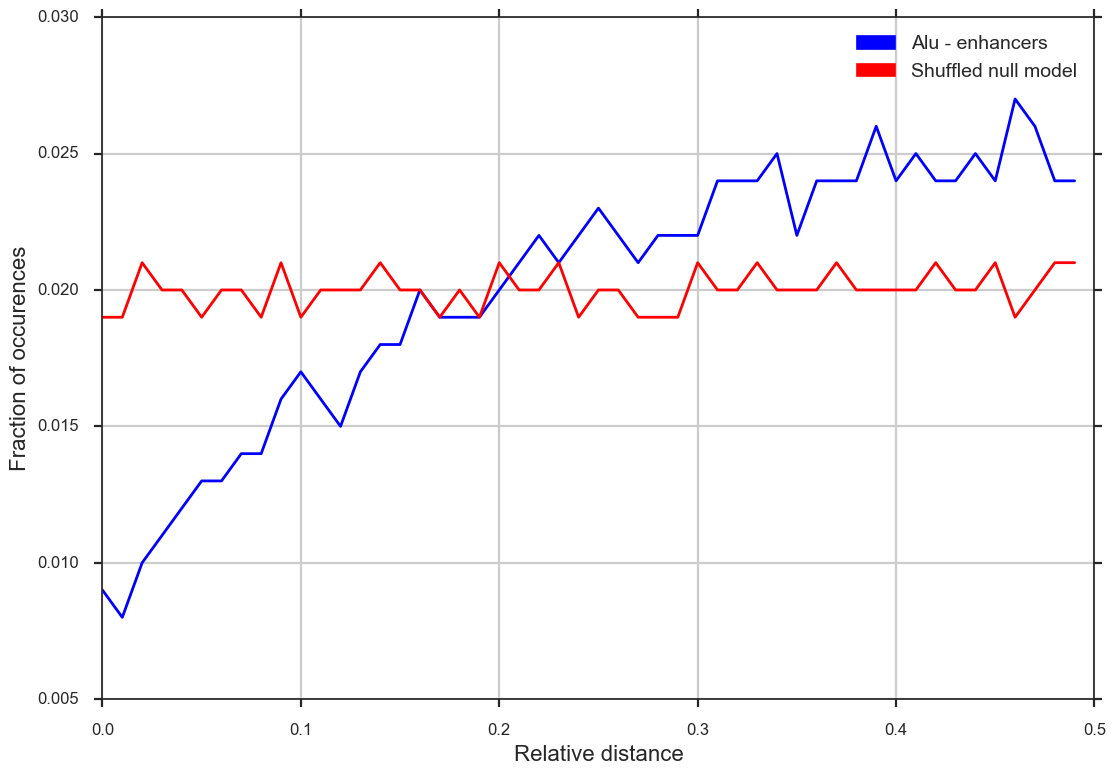

In [22]:
placenta_reldist_df = tissue_reldist_df.query("ovlp_fraction > 0 & biosample_name=='placenta'")

df_reldist = placenta_reldist_df.query("ovlp_encyclopedia=='SINE_Alu'")
df_reldist_random = placenta_reldist_df.query("ovlp_encyclopedia=='SHUFFLED'")


import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})

fig = plt.figure()
ax = fig.add_subplot(111)
g = plt.plot(df_reldist['reldist'], df_reldist['ovlp_fraction'], c='blue')
g = plt.plot(df_reldist_random['reldist'], df_reldist_random['ovlp_fraction'], c='red')

plt.grid()
ax.set_xlabel('Relative distance', size=16)
ax.set_ylabel('Fraction of occurences', size=16)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(12) 
        
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(12) 

green_patch = mpatches.Patch(color='blue', label='Alu - enhancers')
blue_patch = mpatches.Patch(color='red', label='Shuffled null model')

plt.legend(handles=[green_patch, blue_patch], fontsize=14, loc=1)

st.ks_2samp(df_reldist['ovlp_fraction'], df_reldist_random['ovlp_fraction'])

In [7]:
tissue_reldist_df = tissue_reldist_df.query("ovlp_fraction > 0")

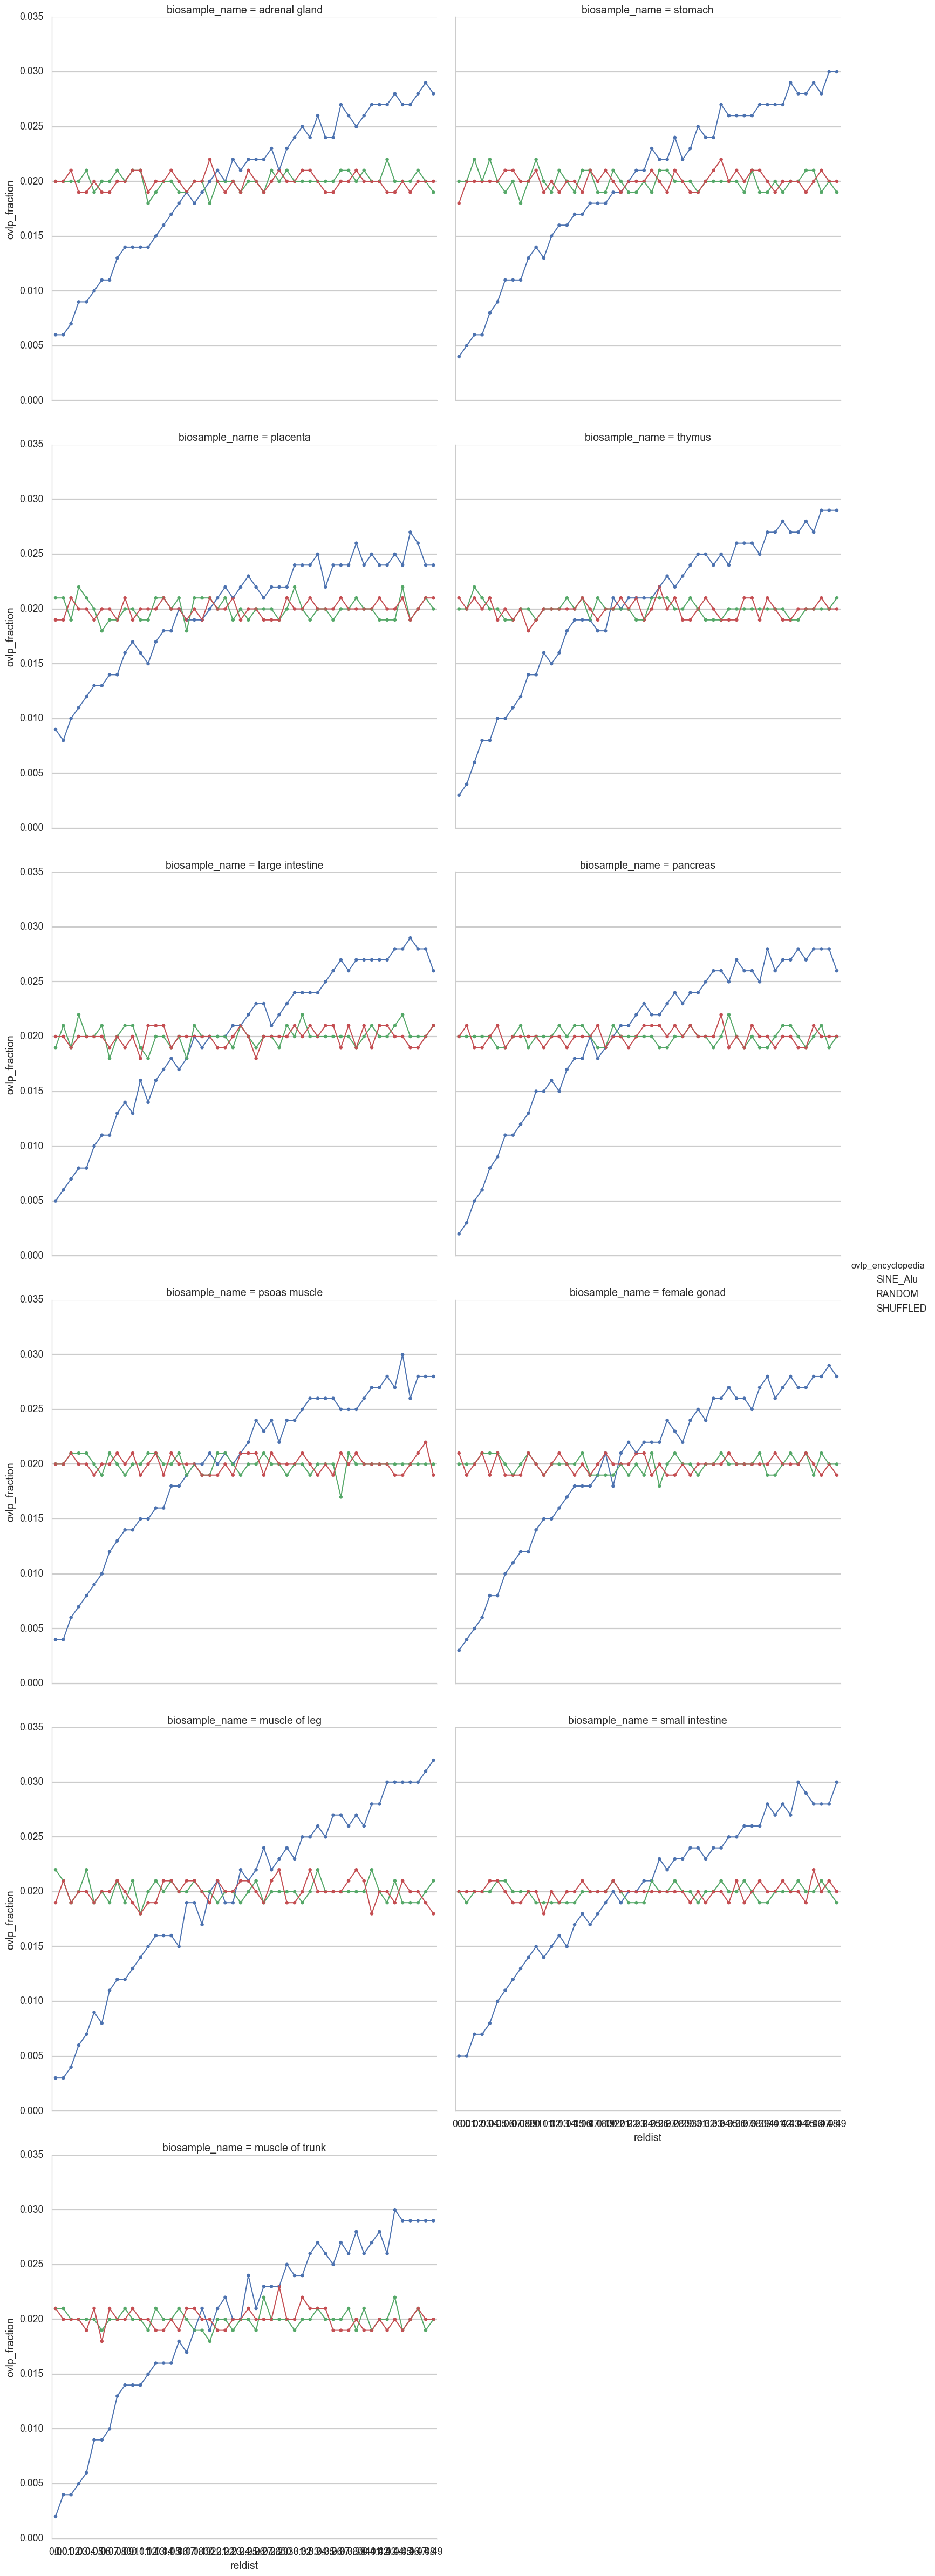

In [15]:
sns.set(style="whitegrid")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.8})

g = sns.FacetGrid(tissue_reldist_df, col="biosample_name", hue="ovlp_encyclopedia", col_wrap=2, size=8)
g.map(sns.pointplot, "reldist", "ovlp_fraction", capsize=.2, size=6, aspect=1)
g.add_legend();

In [21]:
tissue_ovlp_df = pd.read_hdf('../storage/encode_repeatmasker_stats.hdf', 'overlap_hg19_DNase_H3K27ac_tissue_SINE_Alu')

In [22]:
tissue_ovlp_df.T

,0,1,2,3,4,5,6,7,8,9,...,731,732,733,734,735,736,737,738,739,740
biosample_name,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,...,small intestine,small intestine,small intestine,small intestine,small intestine,small intestine,small intestine,small intestine,small intestine,small intestine
biosample_type,tissue,tissue,tissue,tissue,tissue,tissue,tissue,tissue,tissue,tissue,...,tissue,tissue,tissue,tissue,tissue,tissue,tissue,tissue,tissue,tissue
encyclopedia,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,...,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE
encyclopedia_size,38634,38634,38634,38634,38634,38634,38634,38634,38634,38634,...,38719,38719,38719,38719,38719,38719,38719,38719,38719,38719
fisher_left_p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
fisher_oddsratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.014,0.013,0.012,0.011,0.01,0.009,0.008,0.007,0.007,0.006
fisher_right_p,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
fisher_two_p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
jaccard,0.0126206,0.00673911,0.00313833,0.00132417,0.000521404,0.000178938,6.25611e-05,2.45781e-05,1.4002e-05,9.29815e-06,...,0.00049822,0.000427587,0.000386077,0.000351192,0.000319622,0.000291932,0.000271989,0.000248866,0.000225284,0.000205777
min_ovlp,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,...,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95


In [23]:
tissue_ovlp_df['biosample_name'].unique()

array(['adrenal gland', 'stomach', 'placenta', 'thymus', 'large intestine',
       'pancreas', 'psoas muscle', 'female gonad', 'muscle of leg',
       'small intestine', 'muscle of trunk'], dtype=object)

In [8]:
import seaborn as sns
%matplotlib inline

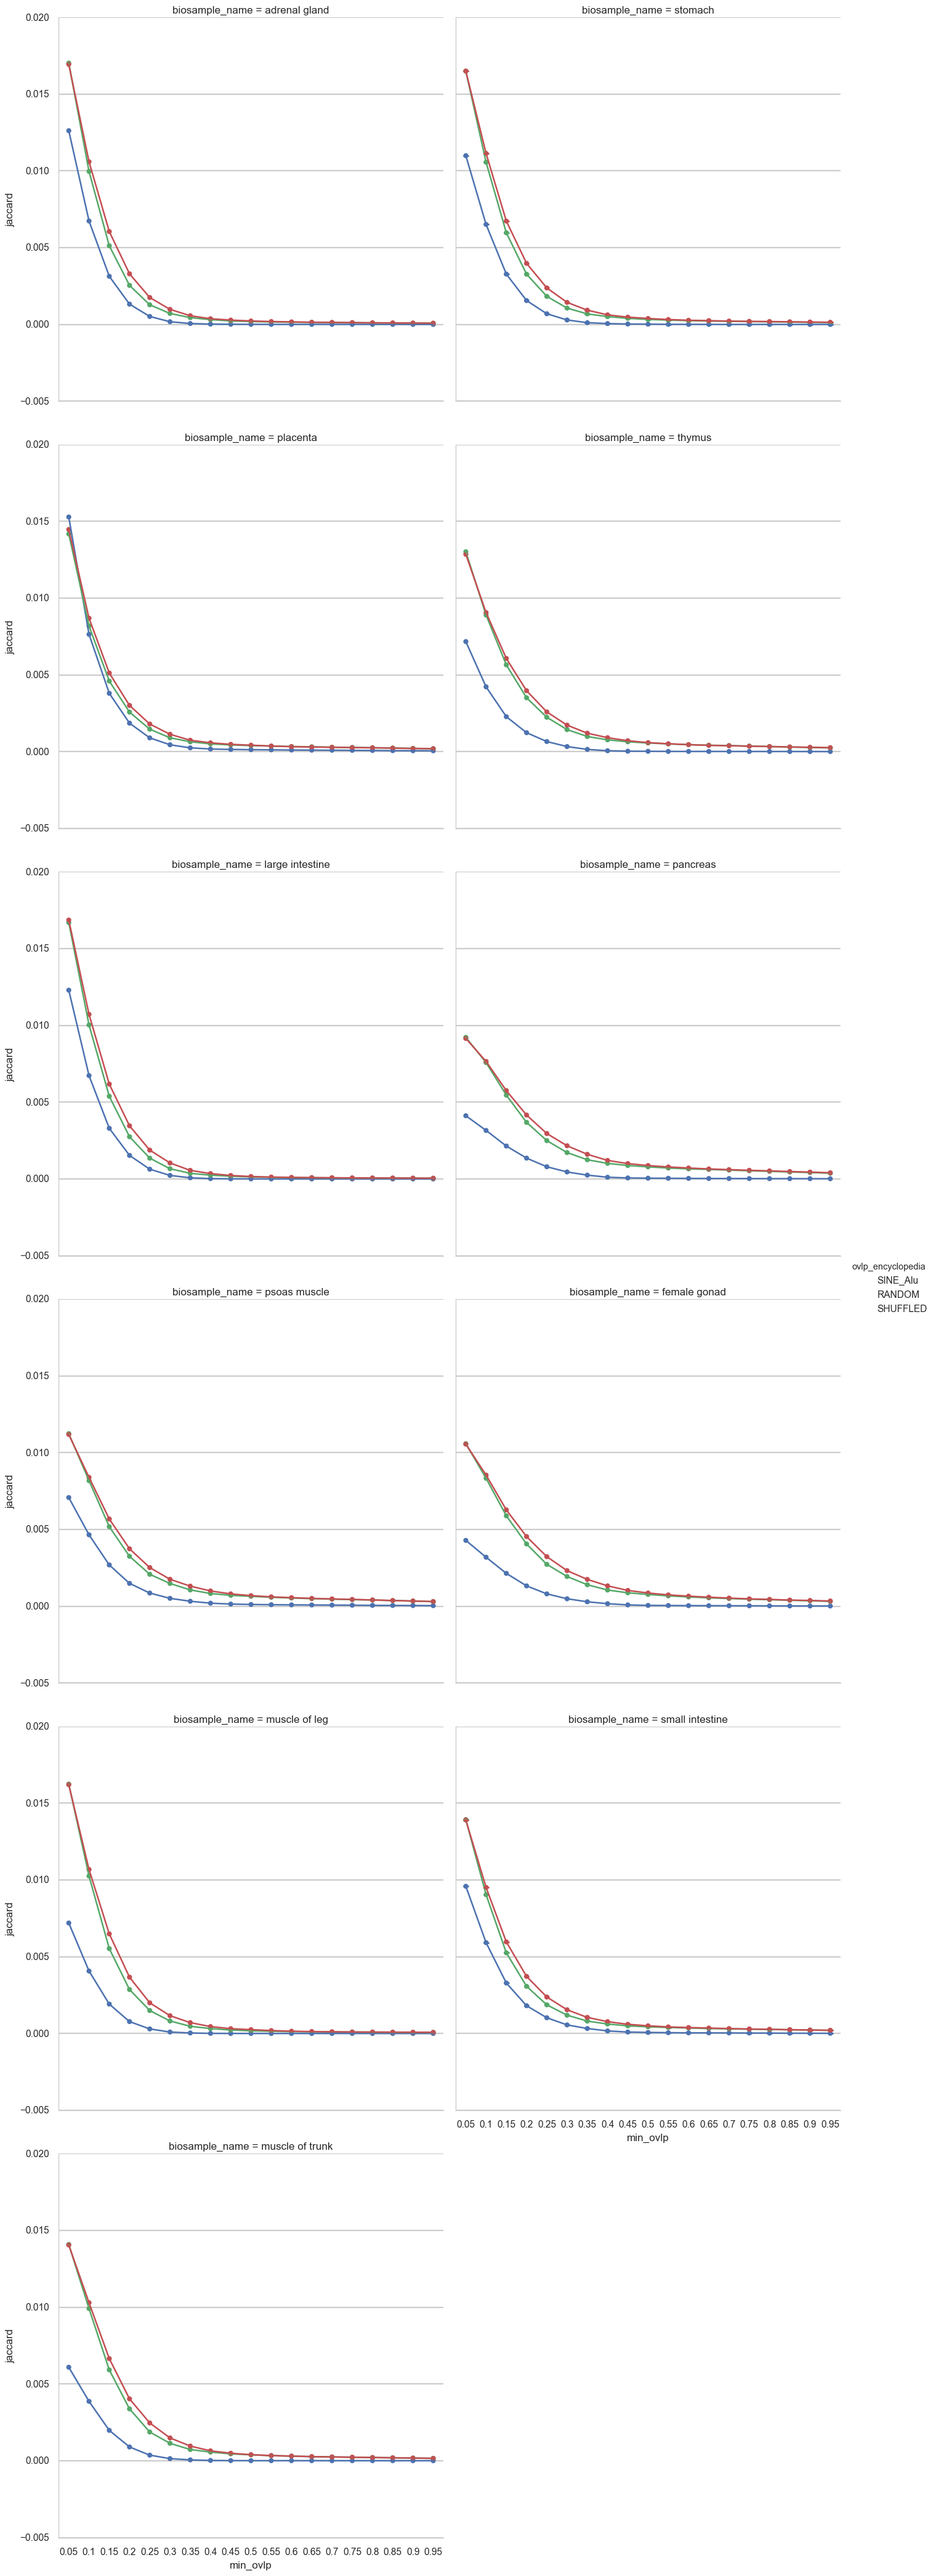

In [24]:
sns.set(style="whitegrid")
sns.set_context("poster", font_scale=0.7, rc={"lines.linewidth": 1})

g = sns.FacetGrid(tissue_ovlp_df, col="biosample_name", hue="ovlp_encyclopedia", col_wrap=2, size=7)
g.map(sns.pointplot, "min_ovlp", "jaccard", capsize=.2, size=6, aspect=1)
g.add_legend();


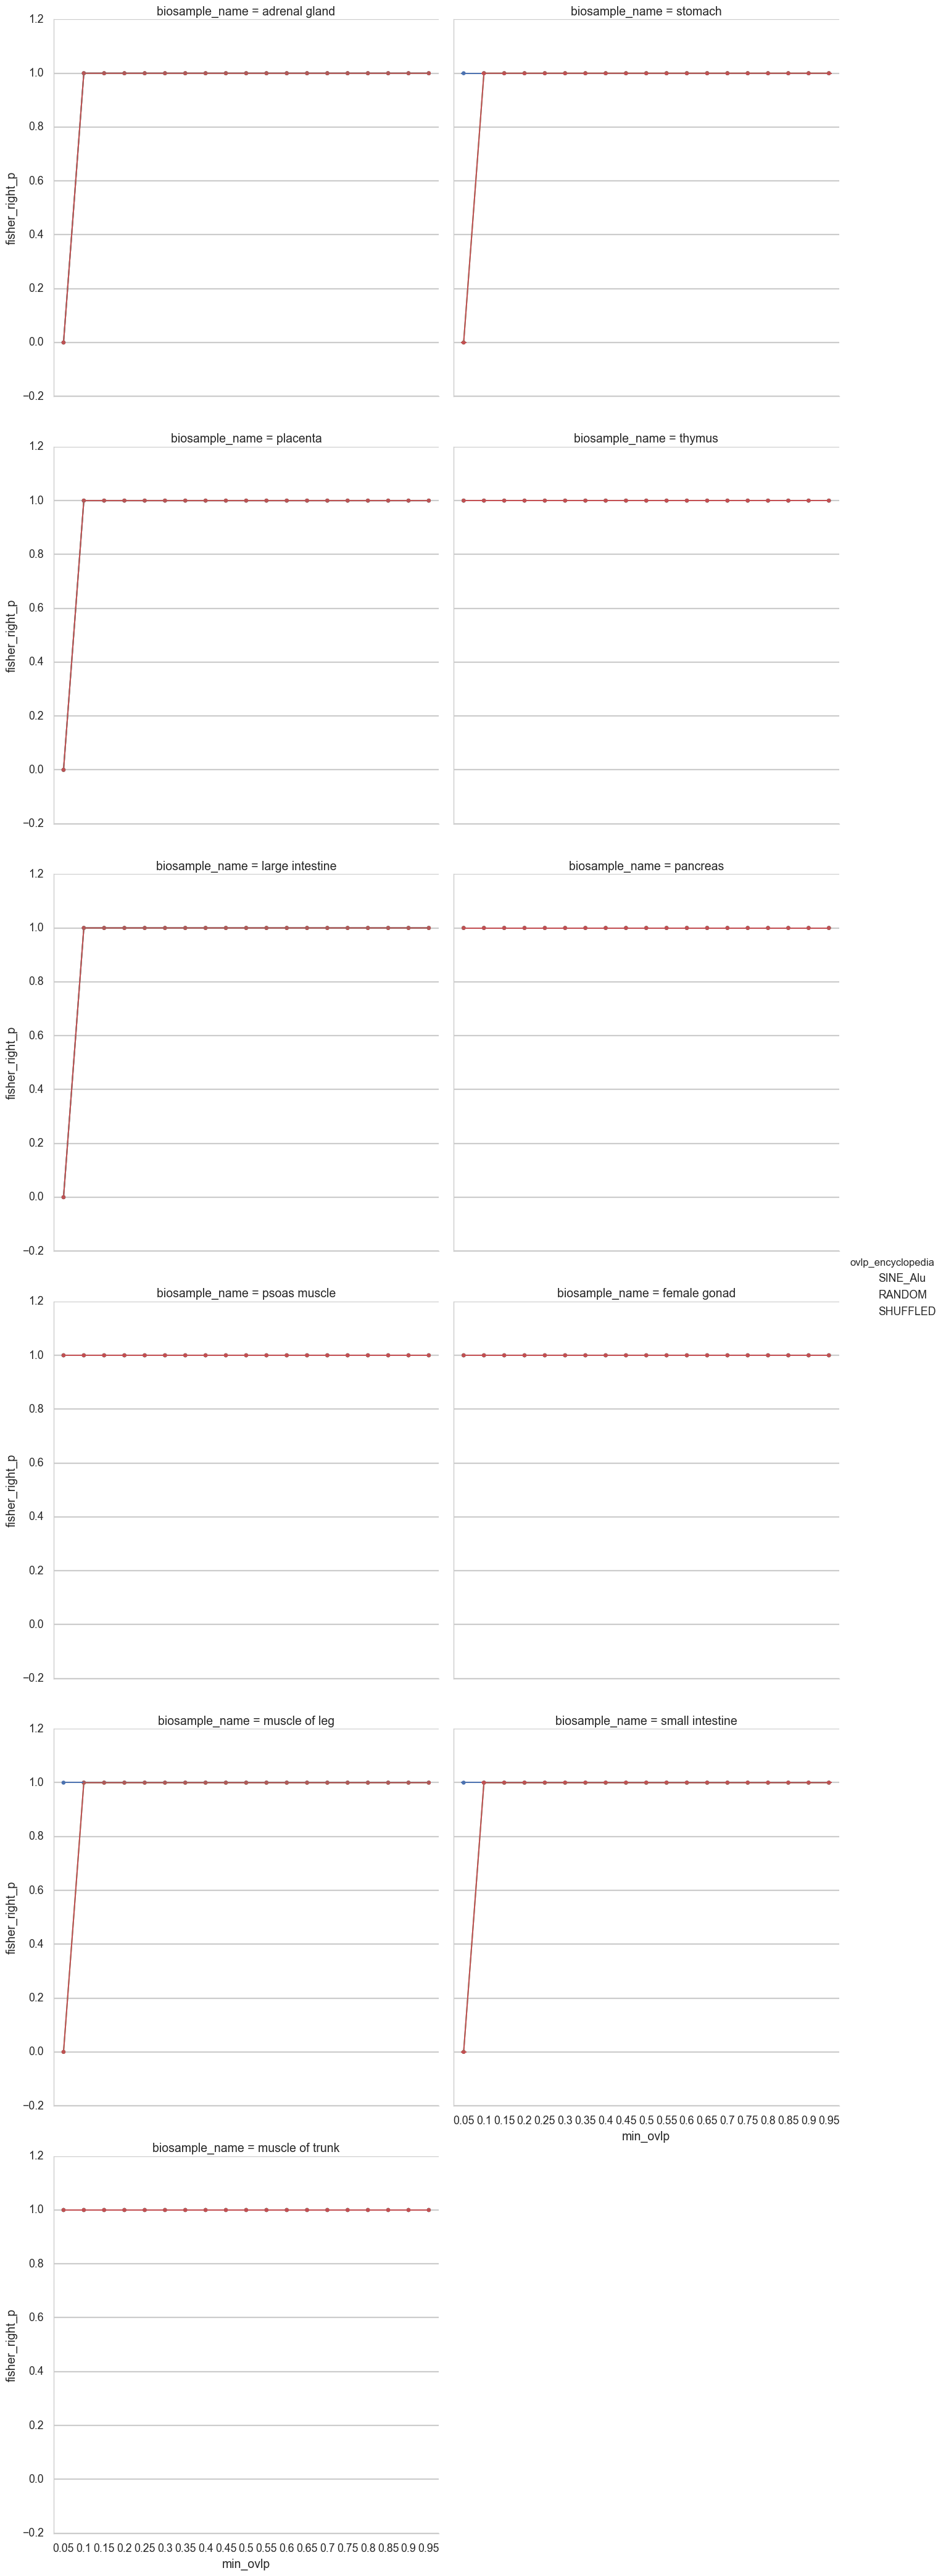

In [25]:
sns.set(style="whitegrid")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.8})

g = sns.FacetGrid(tissue_ovlp_df, col="biosample_name", hue="ovlp_encyclopedia", col_wrap=2, size=7)
g.map(sns.pointplot, "min_ovlp", "fisher_right_p", capsize=.2, size=6, aspect=1)
g.add_legend();
